# Titanic - Simple Classifier - No feature engineering 

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [143]:
# Import dataset
train = pd.read_csv('train.csv',header =0)
test = pd.read_csv('test.csv', header =0)

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

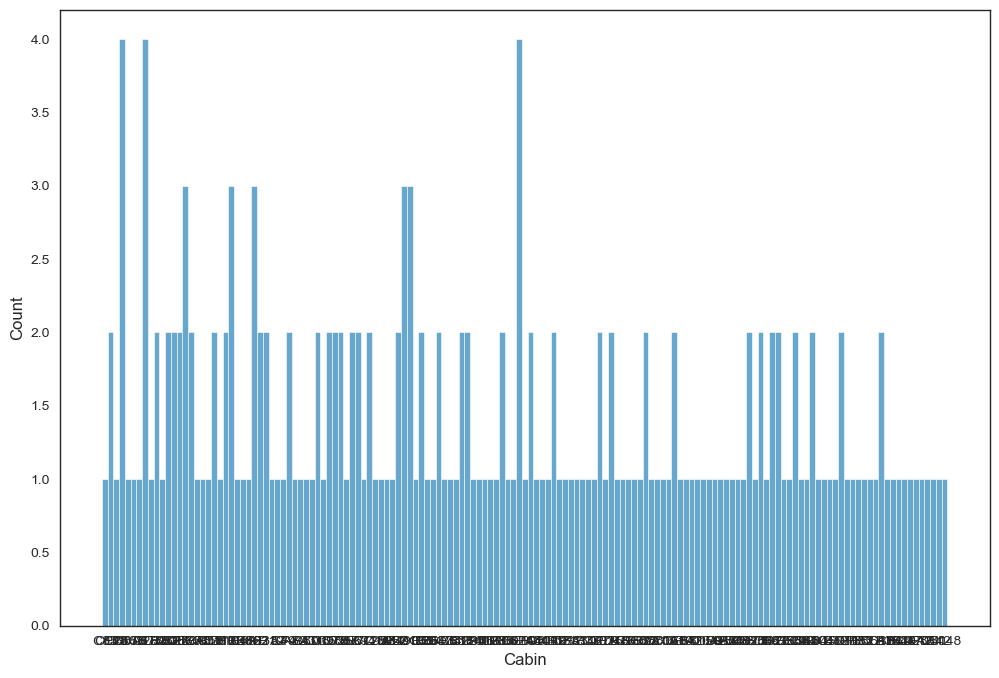

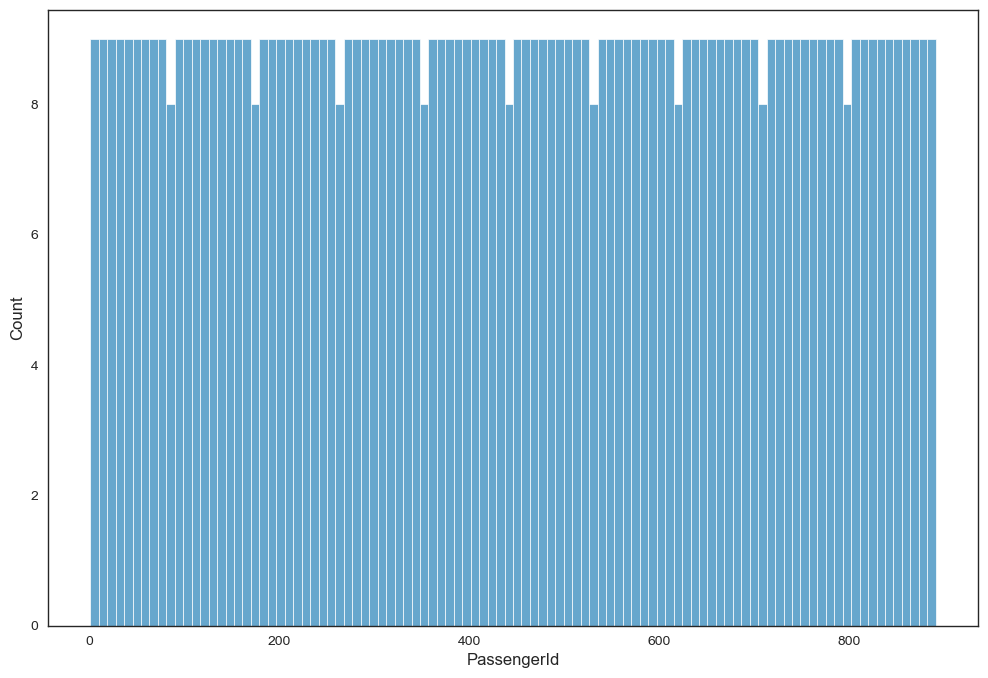

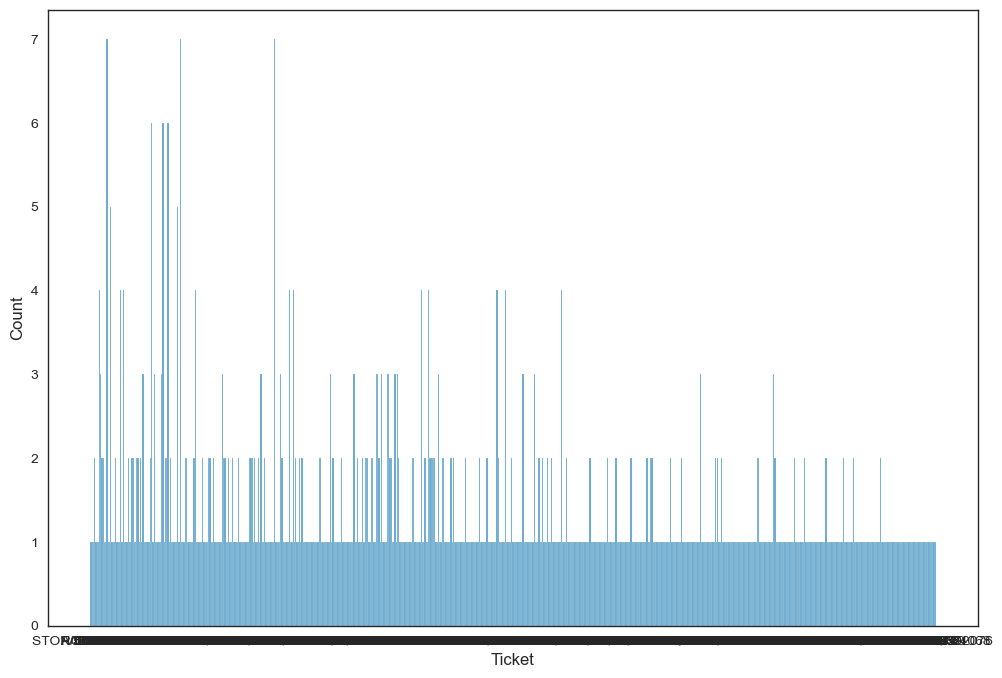

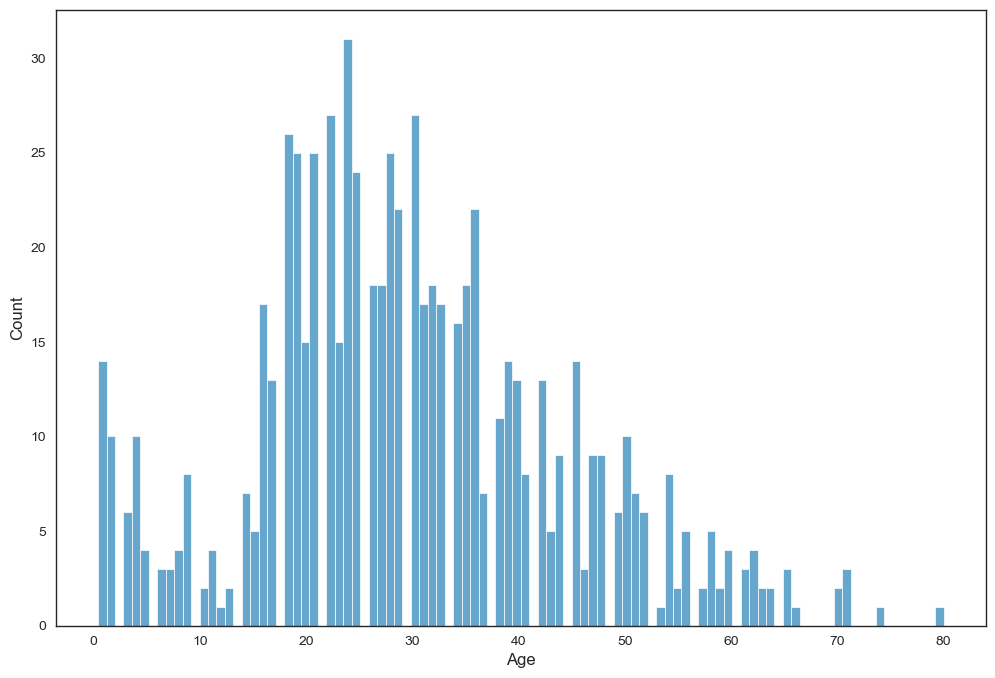

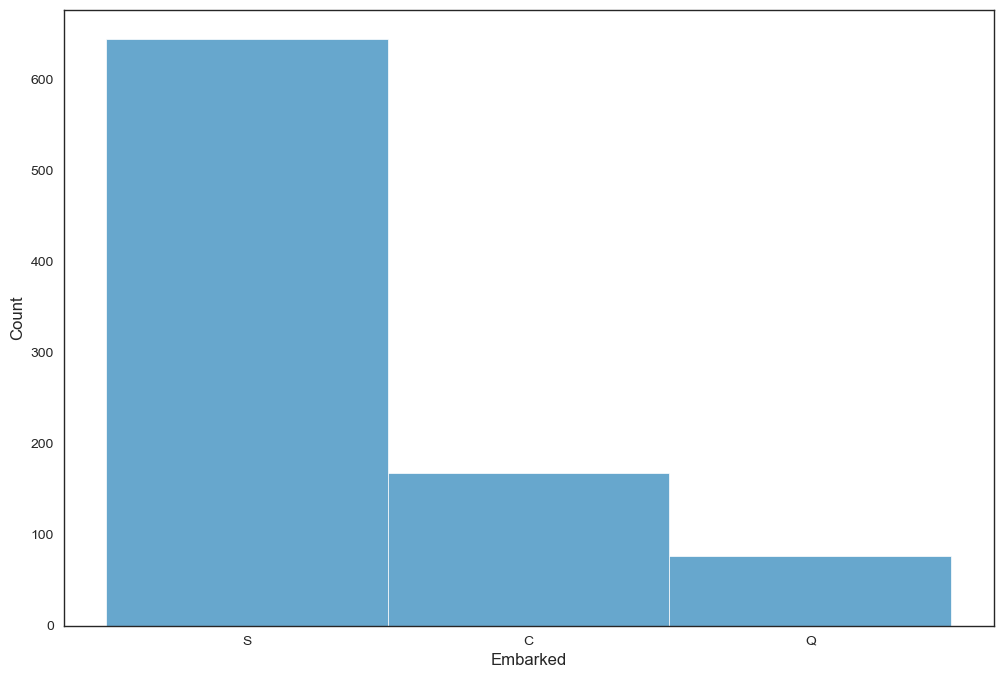

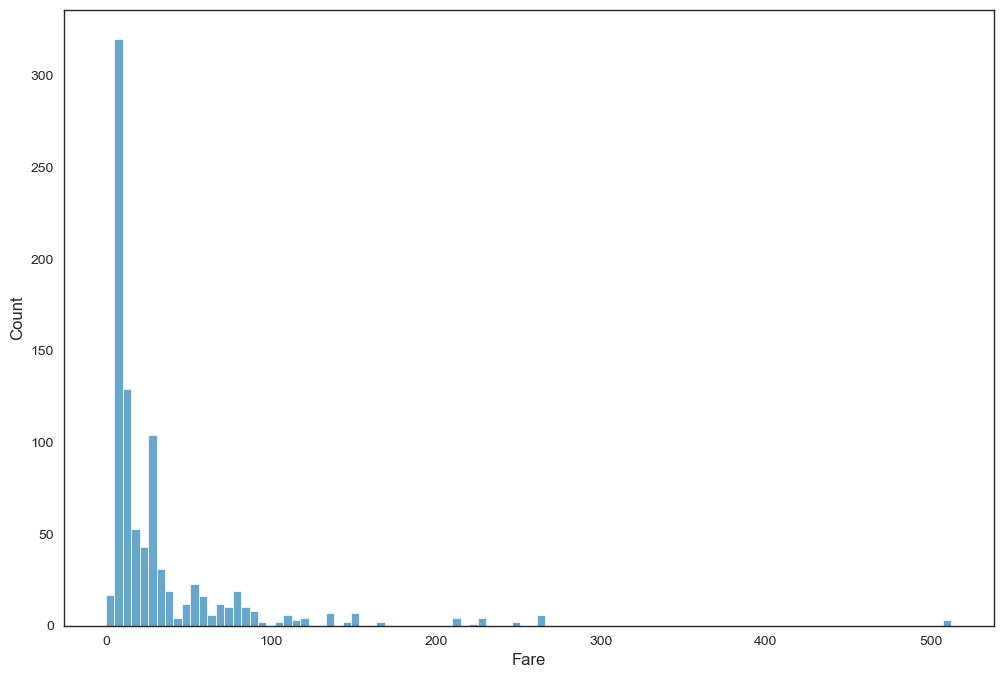

In [144]:
# Check data
print(train.describe(include='all'))


data_cleaner = [train,test]

print("Number of missing values in training set: \n{} \n".format(train.isnull().sum()))
print("Number of missing values in test set: \n{} \n".format(test.isnull().sum()))
# Missing values for Fare, Age, Cabin and Embarked ->  What does distribution look like?
# Drop cabin? Passenginer ID, Ticket ID...
sns.histplot(train['Cabin'], bins=100)
plt.show()
sns.histplot(train['PassengerId'], bins=100)
plt.show()
sns.histplot(train['Ticket'], bins=100)
plt.show()
# Yes -> Drop all three columns

# Check missing values in columns....\
# AGE:
sns.histplot(train['Age'], bins=100)
plt.show()
# Replace with mean
# EMBARKED (categorical):
sns.histplot(train['Embarked'], bins=100)
plt.show()
# Replace with mode
#Fare
sns.histplot(train['Fare'], bins=100)
plt.show()


In [145]:
# Execute cleaning using our combined dataframe list
for dataset in data_cleaner: 
    
    
    dataset.drop(['Cabin','PassengerId','Ticket','Name'], axis=1 ,inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)


    dataset['Age'].fillna(dataset['Age'].median(),inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode(),inplace=True)
print(train.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## Data Preparation

In [155]:
#Encoding
transformer = make_column_transformer((OneHotEncoder(),['Pclass']),remainder='passthrough')

for dataset in data_cleaner:
    transformed = transformer.fit_transform(dataset)
    transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
    print(transformed_df.head())                                      
                                      
                                      


  onehotencoder__Pclass_1 onehotencoder__Pclass_2 onehotencoder__Pclass_3  \
0                     0.0                     0.0                     1.0   
1                     1.0                     0.0                     0.0   
2                     0.0                     0.0                     1.0   
3                     1.0                     0.0                     0.0   
4                     0.0                     0.0                     1.0   

  remainder__Survived remainder__Sex remainder__Age remainder__SibSp  \
0                   0           male           22.0                1   
1                   1         female           38.0                1   
2                   1         female           26.0                0   
3                   1         female           35.0                1   
4                   0           male           35.0                0   

  remainder__Parch remainder__Fare remainder__Embarked  
0                0            7.25             